In [1]:
import sys
sys.executable


'C:\\Users\\Som\\Anaconda3\\envs\\ai\\python.exe'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data=pd.read_csv('C:/Users/Som/AI Workshop/digit Recognizer data/train.csv')
test_data=pd.read_csv('C:/Users/Som/AI Workshop/digit Recognizer data/test.csv')

In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df_X=train_data.drop('label',axis=1)

In [6]:
train_df_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train=train_df_X.values
X_test=test_data.values
y_train=train_data['label'].values
X_train.shape

(42000, 784)

In [8]:
X_train_images=X_train.reshape(-1,28,28)

2


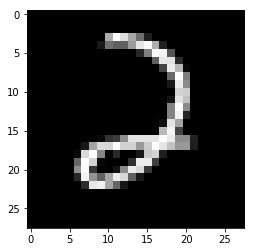

In [9]:
randon_index=np.random.randint(0,len(y_train))
plt.imshow(X_train_images[randon_index],cmap='gray')
print(y_train[randon_index])

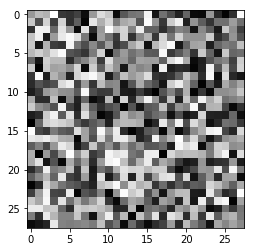

In [10]:
abc=np.random.randint(0,255,(28,28))
plt.imshow(abc,cmap='gray')

In [11]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

Using TensorFlow backend.


In [12]:
def create_model():
    m=Sequential()
    m.add(Dense(16,input_dim=784,activation='relu'))
    m.add(Dense(16,activation='relu'))
    m.add(Dense(10,activation='softmax'))
    return m

In [13]:
model=create_model()

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.01),metrics=['acc'])

In [25]:
from keras.utils import np_utils

In [26]:
y_1h=np_utils.to_categorical(y_train)

In [18]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [19]:
y_1h.shape

(42000, 10)

In [27]:
history=model.fit(X_train,y_1h,epochs=50,batch_size=100)

Epoch 1/50
42000/42000 [==============================] - 2s 59us/step - loss: 14.3205 - acc: 0.1115
Epoch 2/50
42000/42000 [==============================] - 2s 51us/step - loss: 14.3205 - acc: 0.1115
Epoch 3/50
42000/42000 [==============================] - 2s 50us/step - loss: 14.3205 - acc: 0.1115
Epoch 4/50
42000/42000 [==============================] - 2s 51us/step - loss: 14.3205 - acc: 0.1115
Epoch 5/50
42000/42000 [==============================] - 2s 50us/step - loss: 14.3205 - acc: 0.1115
Epoch 6/50
42000/42000 [==============================] - 2s 50us/step - loss: 14.3205 - acc: 0.1115
Epoch 7/50
42000/42000 [==============================] - 2s 50us/step - loss: 14.3205 - acc: 0.1115
Epoch 8/50
42000/42000 [==============================] - 2s 50us/step - loss: 14.3205 - acc: 0.1115
Epoch 9/50
42000/42000 [==============================] - 2s 51us/step - loss: 14.3205 - acc: 0.1115
Epoch 10/50
42000/42000 [==============================] - 2s 50us/step - loss: 14.3205 - a

In [21]:
def vis(h):
    loss=h.history['loss']
    plt.plot(loss)
    plt.grid()

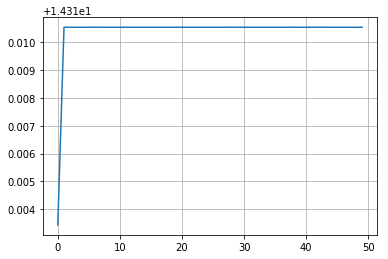

In [22]:
vis(history)